In [191]:
!python -m spacy download en_core_web_lg

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


Sweet, that was easy! Let's load up the package and the embedding library.


In [5]:
import spacy
from collections import OrderedDict
import seaborn as sns
import numpy as np
import nltk

embedder = spacy.load('en_core_web_lg')

In [4]:
conda install seaborn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda




In [54]:
class Operative:
    
    nlp = spacy.load('en_core_web_lg')
    
    def __init__(self, board_words: list) -> None: 
        
        ##     Arguments
        ##     ------------
        ##     board_words : list of the form [] with remaining board words
        ##     my_team : string, which team the bot is on (should be a key in board_dict)
            
        self.board_words = board_words
        # initialise spacy NLP instances
        board_word_nlp = Operative.nlp.pipe(self.board_words)
        
        # get embeddings for words on the board
        self.board_embeddings = np.array([word.vector for word in board_word_nlp])
        
        # calculate L2 norms for board word embeddings
        board_embedding_norms = np.linalg.norm(self.board_embeddings, axis=1, ord=2)
        
        # norm everything to 1
        self.board_embeddings = self.board_embeddings / board_embedding_norms[:, None]

        self.my_team_score = 0
        self.other_team_score = 0
     
    def Guess(self, clue_word, guess_num: int):
    
        ## clue_word (token) - The word given to the Operative as a clue
        ## board_wors (list of token) - Words remaining on the board
        ## guess_num (int) - Number of board_words linked to this clue_word    

        # Create dictionary to hold distance of board words to clue word
        word_dict = OrderedDict()
        clue_word = Operative.nlp(clue_word)

        # Calculate distances and add to dictionary
        for word, emb in zip(self.board_words, self.board_embeddings):

            word_dict[word] = emb @ clue_word.vector
            
        # Order dictionary
        dists = [v for k, v in sorted(word_dict.items(), key=lambda item: item[1])]

        # Colour heatmap
        board_array = np.array(list(word_dict.values())).reshape(5, 5)
        labels_array = np.array(list(word_dict.keys())).reshape(5, 5)

        sns.heatmap(board_array, annot=labels_array, fmt='')  
    
        return board_array, labels_array

In [55]:
board = ['STEEL', 'CHURCHILL', 'OPERA', 'BULB', 'NOTRE DAME', 'PASTE', 'HEAD', 'FIELD', 
         'COVER', 'SATURN', 'COLOSSEUM', 'PEARL', 'CLEOPATRA', 'NYLON', 'MARIE CURIE', 'GEAR', 
         'UNICORN', 'HELMET', 'GATES', 'SPRAY', 'SPINE', 'SILK', 'ROAD', 'COUNTRY', 'STRING']

In [56]:
op = Operative(board)

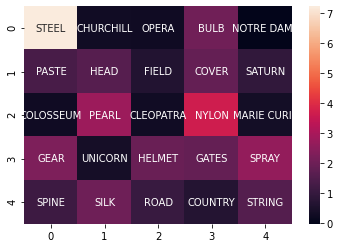

In [57]:
d = op.Guess('STAINLESS', 3)